In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import cv2
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import sys
import xgboost as xgb

## EDA

In [5]:
!unzip -qq '/content/drive/MyDrive/Data/airline_dataset.zip'

In [7]:
path = '/content/drive/MyDrive/Data/airline/'
test = pd.read_csv(path + 'test.csv', encoding='utf-8')
train = pd.read_csv(path + 'train.csv', encoding='utf-8')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 2000 non-null   int64  
 1   Gender                             2000 non-null   object 
 2   Customer Type                      2000 non-null   object 
 3   Age                                2000 non-null   int64  
 4   Type of Travel                     2000 non-null   object 
 5   Class                              2000 non-null   object 
 6   Flight Distance                    2000 non-null   int64  
 7   Seat comfort                       2000 non-null   int64  
 8   Departure/Arrival time convenient  2000 non-null   int64  
 9   Food and drink                     2000 non-null   int64  
 10  Gate location                      2000 non-null   int64  
 11  Inflight wifi service              2000 non-null   int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

In [9]:
airline = test + train
airline.describe()

,Age,Arrival Delay in Minutes,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Departure/Arrival time convenient,Ease of Online booking,Flight Distance,Food and drink,Gate location,Inflight entertainment,Inflight wifi service,Leg room service,On-board service,Online boarding,Online support,Seat comfort,id,target
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,0.0
mean,78.512500,28.477000,7.397000,6.704000,7.418000,27.363000,6.054500,6.91400,3976.094000,5.771000,6.014000,6.768000,6.466500,6.97250,7.010000,6.683000,6.967500,5.768500,2001.000000,NaN
std,21.045767,50.946425,1.611425,1.762083,1.617895,50.132483,2.149381,1.86369,1474.210302,2.007878,1.834799,1.901574,1.851105,1.82055,1.756543,1.837716,1.849095,1.979613,1154.989177,NaN
min,23.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,2.00000,171.000000,0.000000,2.000000,0.000000,2.000000,1.00000,2.000000,2.000000,2.000000,0.000000,2.000000,NaN
25%,65.000000,0.000000,6.000000,5.000000,6.000000,0.000000,5.000000,6.00000,2948.000000,4.000000,5.000000,5.000000,5.000000,6.00000,6.000000,5.000000,6.000000,4.000000,1001.500000,NaN
50%,78.000000,9.000000,8.000000,7.000000,8.000000,8.000000,6.000000,7.00000,3909.500000,6.000000,6.000000,7.000000,6.000000,7.00000,7.000000,7.000000,7.000000,6.000000,2001.000000,NaN
75%,94.000000,35.000000,9.000000,8.000000,9.000000,33.000000,8.000000,8.00000,4879.000000,7.000000,7.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,7.000000,3000.500000,NaN
max,149.000000,638.000000,10.000000,10.000000,10.000000,652.000000,10.000000,10.00000,9982.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,4000.000000,NaN


In [10]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


In [11]:
print(train.shape, test.shape)

(3000, 24) (2000, 23)


In [19]:
train_target = train['target']

In [28]:
features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
train_num_1 = train.drop(features, axis='columns')
train_num = train_num_1.drop(['target'], axis='columns')
test_num = test.drop(features, axis='columns')

In [29]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_num)
train_scaled = ss.transform(train_num)
test_scaled = ss.transform(test_num)

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))

0.8056666666666666


In [33]:
print(lr.coef_, lr.intercept_)

[[ 3.37537941e-02  8.73114891e-02 -5.89052486e-04  5.28782414e-01
  -3.47128255e-01 -4.18140750e-01  1.26931085e-01 -3.01879544e-01
   1.10090394e+00  3.51514351e-01  5.48685335e-01  5.31296057e-01
   3.28653249e-01 -1.14500337e-01  2.78843101e-01 -3.07008740e-02
   8.58177096e-02  1.37568745e-01 -4.68055804e-01]] [0.30792887]


In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))

1.0


다시 해야할것같음..

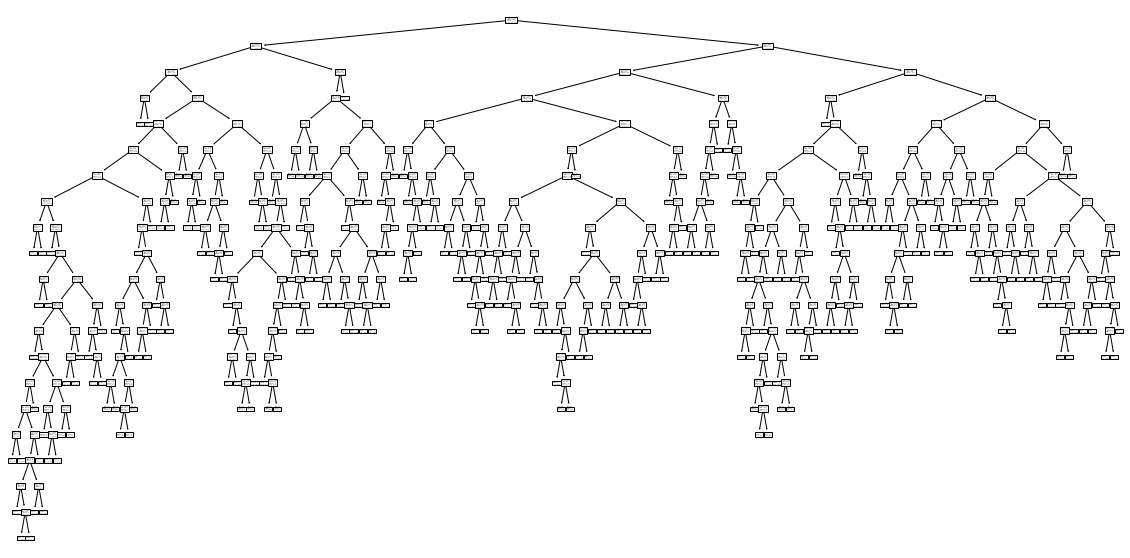

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt)
plt.show()